# Heart Disease Classification

# Contents:
1. **Importing Libraries**  
    1.1 Loading Data  
    1.2 Looking for Missing Values
2. **Detecting and dealing with Outliers**  
    2.1 Outlier Detection

## 1. Importing Lbiraries

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats


### 1.1 Loading Data

In [34]:
df = pd.read_csv("cardio_train.csv", delimiter=';')

In [35]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


### 1.2 Looking for missing values

In [36]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [37]:
#Another way to visualise missing values in a heat map.
# cols = df.columns[:30] # first 30 columns
# colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
# sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [38]:
#Another way to display missing values 
# for col in df.columns:
#     pct_missing = np.mean(df[col].isnull())
#     print('{} - {}%'.format(col, round(pct_missing*100)))

## 2.Detecting and dealing with Outlier Data

In [39]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

## 2.1 Outlier Detection

In [40]:
df.ap_hi.describe()

count    70000.000000
mean       128.817286
std        154.011419
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64

In [41]:
df.ap_lo.describe()

count    70000.000000
mean        96.630414
std        188.472530
min        -70.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      11000.000000
Name: ap_lo, dtype: float64

In [42]:
# out_hidi = df['ap_lo'] < 150
# out_hidi.sum()
# no_lo_dis_df = df[out_hidi]
# no_lo_dis = no_lo_dis_df['ap_lo'] < 150
# no_lo_dis.sum()

In [63]:
# Age range
print('Max = ', df.age.min()/360, '\n',
     'Min = ', df.age.max()/360, '\n',
      'Range = ', df.age.max()/360 - df.age.min()/360
     )

Max =  29.994444444444444 
 Min =  65.86944444444444 
 Range =  35.875


In [43]:
out_lodi = df['ap_lo'] > 40
out_lodi.sum()

69924

In [97]:
out_hisys = df['ap_hi'] < 210

In [98]:
out_hisys.sum()

69902

In [99]:
out_losys = df['ap_hi'] > 70

In [100]:
out_losys.sum()

69793

In [101]:
out_height = df['height'] > 120
out_height.sum()

69914

In [102]:
out_weight = df['weight'] > 40

In [103]:
out_weight.sum()

69906

In [104]:
new_df = terriblfunc(df)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [105]:
new_tallies = new_df['height'] < 120

In [106]:
new_tallies.sum()

51

## 2.2 Boxplots to explore and visualise outlier data:

In [12]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

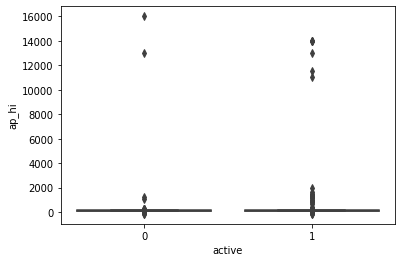

In [31]:
import seaborn as sns
sns.boxplot(y = df['ap_hi'], x = df['active'])

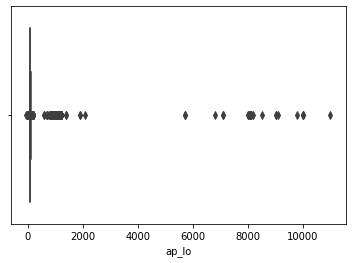

In [24]:
sns.boxplot(x = df['ap_lo'])

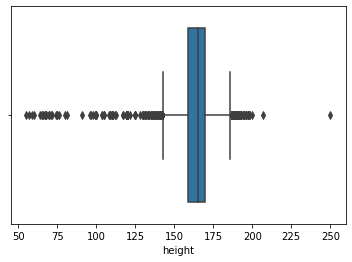

In [21]:
sns.boxplot(x = df['height']) 

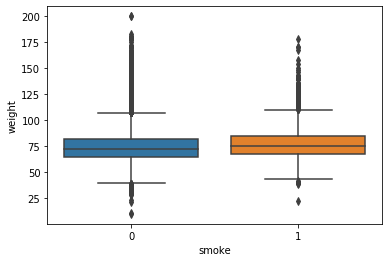

In [65]:
sns.boxplot(y = df['weight'], x = df['smoke'])

## 2.3 IQR Calculation for Outlier Detection

In [74]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id             49882.5
age             3663.0
gender             1.0
height            11.0
weight            17.0
ap_hi             20.0
ap_lo             10.0
cholesterol        1.0
gluc               0.0
smoke              0.0
alco               0.0
active             0.0
cardio             1.0
dtype: float64


In [77]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
df_cont = df[['age', 'height', 'weight', 'ap_hi', 'ap_lo']]

In [79]:
df_cont

,age,height,weight,ap_hi,ap_lo
0,18393,168,62.0,110,80
1,20228,156,85.0,140,90
2,18857,165,64.0,130,70
3,17623,169,82.0,150,100
4,17474,156,56.0,100,60
...,...,...,...,...,...
69995,19240,168,76.0,120,80
69996,22601,158,126.0,140,90
69997,19066,183,105.0,180,90
69998,22431,163,72.0,135,80


In [80]:
Q1 = df_cont.quantile(0.25)
Q3 = df_cont.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age       3663.0
height      11.0
weight      17.0
ap_hi       20.0
ap_lo       10.0
dtype: float64


In [85]:
print(df_cont < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

         age  height  weight  ap_hi  ap_lo
0      False   False   False  False  False
1      False   False   False  False  False
2      False   False   False  False  False
3      False   False   False  False  False
4      False   False   False  False   True
...      ...     ...     ...    ...    ...
69995  False   False   False  False  False
69996  False   False   False  False  False
69997  False   False   False  False  False
69998  False   False   False  False  False
69999  False   False   False  False  False

[70000 rows x 5 columns]


TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [88]:

z = np.abs(stats.zscore(df_cont))
print(z)

[[0.43606151 0.44345206 0.84787326 0.12218198 0.0882385 ]
 [0.30768633 1.01816804 0.74983117 0.07261016 0.03517999]
 [0.24799666 0.07804703 0.70894244 0.00767945 0.14129701]
 ...
 [0.16328642 2.27047718 2.13913938 0.33233302 0.03517999]
 [1.20058905 0.16555632 0.15321916 0.04014481 0.0882385 ]
 [0.43414373 0.68705541 0.15321916 0.05725127 0.0882385 ]]


In [97]:
df_cont_z = df_cont[(z < 3).all(axis=1)]
df_cont_z

df_cat = df[['id', 'gender', 'active', 'smoke', 'cholesterol', 'gluc', 'alco', 'cardio']]

In [110]:
# df_cont_z.merge(df_cat)
dfnew = df_cat.join(df_cont_z)

## 2.4 Outlier Removal 

In [112]:
dfnew.isna().sum()
dfnew

,id,gender,active,smoke,cholesterol,gluc,alco,cardio,age,height,weight,ap_hi,ap_lo
0,0,2,1,0,1,1,0,0,18393.0,168.0,62.0,110.0,80.0
1,1,1,1,0,3,1,0,1,20228.0,156.0,85.0,140.0,90.0
2,2,1,0,0,3,1,0,1,18857.0,165.0,64.0,130.0,70.0
3,3,2,1,0,1,1,0,1,17623.0,169.0,82.0,150.0,100.0
4,4,1,0,0,1,1,0,0,17474.0,156.0,56.0,100.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,2,1,1,1,1,0,0,19240.0,168.0,76.0,120.0,80.0
69996,99995,1,1,0,2,2,0,1,NaN,NaN,NaN,NaN,NaN
69997,99996,2,0,0,3,1,1,1,19066.0,183.0,105.0,180.0,90.0
69998,99998,1,0,0,1,2,0,1,22431.0,163.0,72.0,135.0,80.0


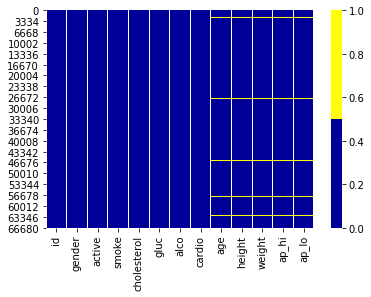

In [115]:
# Another way to visualise missing values in a heat map.
cols = dfnew.columns[:] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(dfnew[cols].isnull(), cmap=sns.color_palette(colours))

In [116]:
# Another way to display missing values 
for col in dfnew.columns:
    pct_missing = np.mean(dfnew[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0.0%
gender - 0.0%
active - 0.0%
smoke - 0.0%
cholesterol - 0.0%
gluc - 0.0%
alco - 0.0%
cardio - 0.0%
age - 3.0%
height - 3.0%
weight - 3.0%
ap_hi - 3.0%
ap_lo - 3.0%


In [117]:
dfnew.dropna(axis=0, how='any', inplace=True)

In [121]:
dfnew.isna().sum()

id             0
gender         0
active         0
smoke          0
cholesterol    0
gluc           0
alco           0
cardio         0
age            0
height         0
weight         0
ap_hi          0
ap_lo          0
dtype: int64

## Next time on ABCD Check for skinnies under 40 kg and other NHS guideline outliers. yeh

In [123]:
test = dfnew['weight'] < 40

In [124]:
test.sum()

35

In [128]:
dfnew = dfnew[dfnew.weight > 40]

In [131]:
test2 = dfnew.weight <40

In [132]:
test2.sum()

0